In [17]:
import pandas as pd

ankle_path = 'PositionDatasets/Ankle_dataset.csv'
belt_path = 'PositionDatasets/Belt_dataset.csv'
neck_path = 'PositionDatasets/Neck_dataset.csv'
pocket_path = 'PositionDatasets/Pocket_dataset.csv'
wrist_path = 'PositionDatasets/Wrist_dataset.csv'

Ankle = pd.read_csv(ankle_path)
Belt = pd.read_csv(belt_path)
Neck = pd.read_csv(neck_path)
Pocket = pd.read_csv(pocket_path)
Wrist = pd.read_csv(wrist_path)

Ankle.info()
Belt.info()
Neck.info()
Pocket.info()
Wrist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294678 entries, 0 to 294677
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   TimeStamp     294678 non-null  object 
 1   Ankle_acc_x   294678 non-null  float64
 2   Ankle_acc_y   294678 non-null  float64
 3   Ankle_acc_z   294678 non-null  float64
 4   Ankle_gyro_x  294678 non-null  float64
 5   Ankle_gyro_y  294678 non-null  float64
 6   Ankle_gyro_z  294678 non-null  float64
 7   Subject       294678 non-null  int64  
 8   Activity      294678 non-null  int64  
 9   Trial         294678 non-null  int64  
 10  Tag           294678 non-null  int64  
dtypes: float64(6), int64(4), object(1)
memory usage: 24.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294678 entries, 0 to 294677
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   TimeStamp    294678 non-null  object 
 1   Belt_acc_

In [18]:
print(Ankle.isnull().sum())
print(Belt.isnull().sum())
print(Neck.isnull().sum())
print(Pocket.isnull().sum())
print(Wrist.isnull().sum())

TimeStamp       0
Ankle_acc_x     0
Ankle_acc_y     0
Ankle_acc_z     0
Ankle_gyro_x    0
Ankle_gyro_y    0
Ankle_gyro_z    0
Subject         0
Activity        0
Trial           0
Tag             0
dtype: int64
TimeStamp      0
Belt_acc_x     0
Belt_acc_y     0
Belt_acc_z     0
Belt_gyro_x    0
Belt_gyro_y    0
Belt_gyro_z    0
Subject        0
Activity       0
Trial          0
Tag            0
dtype: int64
TimeStamp      0
Neck_acc_x     0
Neck_acc_y     0
Neck_acc_z     0
Neck_gyro_x    0
Neck_gyro_y    0
Neck_gyro_z    0
Subject        0
Activity       0
Trial          0
Tag            0
dtype: int64
TimeStamp            0
Pocket_acc_x     36109
Pocket_acc_y     36109
Pocket_acc_z     36109
Pocket_gyro_x    36109
Pocket_gyro_y    36109
Pocket_gyro_z    36109
Subject              0
Activity             0
Trial                0
Tag                  0
dtype: int64
TimeStamp       0
Wrist_acc_x     0
Wrist_acc_y     0
Wrist_acc_z     0
Wrist_gyro_x    0
Wrist_gyro_y    0
Wrist_gyro_z   

In [19]:
Pocket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294678 entries, 0 to 294677
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TimeStamp      294678 non-null  object 
 1   Pocket_acc_x   258569 non-null  float64
 2   Pocket_acc_y   258569 non-null  float64
 3   Pocket_acc_z   258569 non-null  float64
 4   Pocket_gyro_x  258569 non-null  float64
 5   Pocket_gyro_y  258569 non-null  float64
 6   Pocket_gyro_z  258569 non-null  float64
 7   Subject        294678 non-null  int64  
 8   Activity       294678 non-null  int64  
 9   Trial          294678 non-null  int64  
 10  Tag            294678 non-null  int64  
dtypes: float64(6), int64(4), object(1)
memory usage: 24.7+ MB


In [20]:
import pandas as pd

# Remove rows with any null value, modifying 'df' directly
Pocket.dropna(inplace=True)


In [21]:
Pocket.info()

<class 'pandas.core.frame.DataFrame'>
Index: 258569 entries, 0 to 294677
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TimeStamp      258569 non-null  object 
 1   Pocket_acc_x   258569 non-null  float64
 2   Pocket_acc_y   258569 non-null  float64
 3   Pocket_acc_z   258569 non-null  float64
 4   Pocket_gyro_x  258569 non-null  float64
 5   Pocket_gyro_y  258569 non-null  float64
 6   Pocket_gyro_z  258569 non-null  float64
 7   Subject        258569 non-null  int64  
 8   Activity       258569 non-null  int64  
 9   Trial          258569 non-null  int64  
 10  Tag            258569 non-null  int64  
dtypes: float64(6), int64(4), object(1)
memory usage: 23.7+ MB


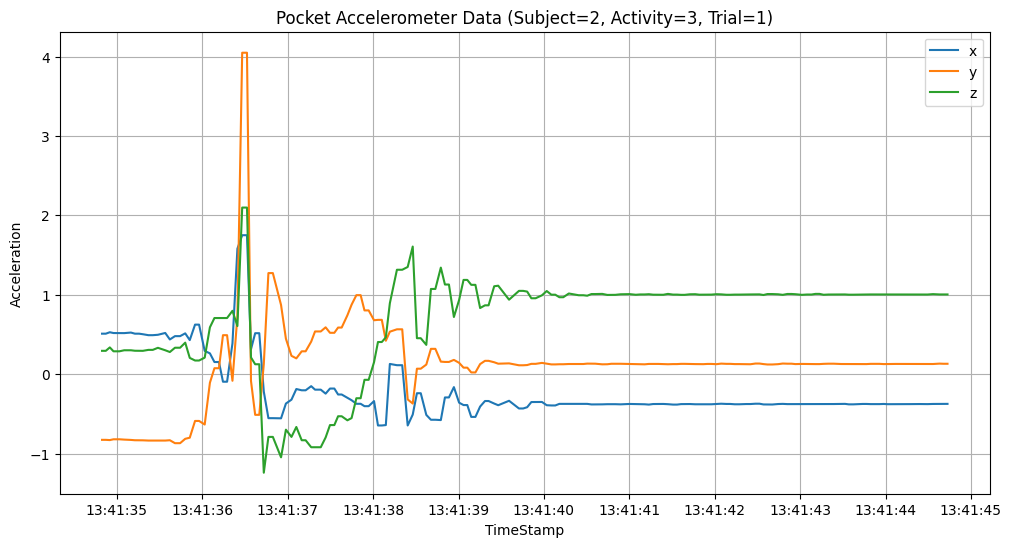

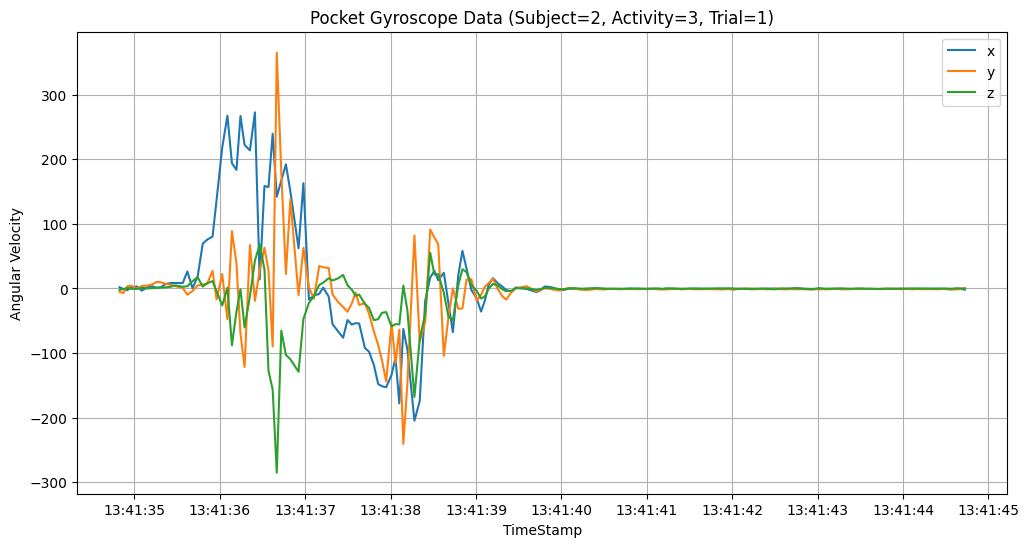

In [22]:
import matplotlib.pyplot as plt

def plot_sensor_data_dynamic_with_timestamp(dataset_name, subject_id, activity_id, trial_id):
    """
    Plots the accelerometer (x, y, z) and gyroscope (x, y, z) on separate
    graphs from the specified dataset, for a given Subject, Activity, and Trial.
    Converts 'TimeStamp' to datetime for proper plotting.

    Args:
        dataset_name (str): The name of the dataset to plot
                            ('Ankle', 'Belt', 'Neck', 'Pocket', 'Wrist').
        subject_id (int): The ID of the subject to filter by.
        activity_id (int): The ID of the activity to filter by.
        trial_id (int): The ID of the trial to filter by.
    """
    if dataset_name == 'Ankle':
        df = Ankle
        accel_cols = ['Ankle_acc_x', 'Ankle_acc_y', 'Ankle_acc_z']
        gyro_cols = ['Ankle_gyro_x', 'Ankle_gyro_y', 'Ankle_gyro_z']
        title_prefix = 'Ankle'
    elif dataset_name == 'Belt':
        df = Belt
        accel_cols = ['Belt_acc_x', 'Belt_acc_y', 'Belt_acc_z']
        gyro_cols = ['Belt_gyro_x', 'Belt_gyro_y', 'Belt_gyro_z']
        title_prefix = 'Belt'
    elif dataset_name == 'Neck':
        df = Neck
        accel_cols = ['Neck_acc_x', 'Neck_acc_y', 'Neck_acc_z']
        gyro_cols = ['Neck_gyro_x', 'Neck_gyro_y', 'Neck_gyro_z']
        title_prefix = 'Neck'
    elif dataset_name == 'Pocket':
        df = Pocket
        accel_cols = ['Pocket_acc_x', 'Pocket_acc_y', 'Pocket_acc_z']
        gyro_cols = ['Pocket_gyro_x', 'Pocket_gyro_y', 'Pocket_gyro_z']
        title_prefix = 'Pocket'
    elif dataset_name == 'Wrist':
        df = Wrist
        accel_cols = ['Wrist_acc_x', 'Wrist_acc_y', 'Wrist_acc_z']
        gyro_cols = ['Wrist_gyro_x', 'Wrist_gyro_y', 'Wrist_gyro_z']
        title_prefix = 'Wrist'
    else:
        print("Invalid dataset name. Please choose from 'Ankle', 'Belt', 'Neck', 'Pocket', 'Wrist'.")
        return

    # Convert 'TimeStamp' to datetime objects
    df['TimeStamp'] = pd.to_datetime(df['TimeStamp'])

    # Filter for the specified Subject, Activity, and Trial
    filtered_df = df[(df['Subject'] == subject_id) & (df['Activity'] == activity_id) & (df['Trial'] == trial_id)]

    if filtered_df.empty:
        print(f"No data found for Subject={subject_id}, Activity={activity_id}, Trial={trial_id} in the {dataset_name} dataset.")
        return

    # Plot Accelerometer data
    plt.figure(figsize=(12, 6))
    for col in accel_cols:
        axis = col.split("_")[-1]  # Get x, y, or z
        plt.plot(filtered_df['TimeStamp'], filtered_df[col], label=axis)
    plt.xlabel("TimeStamp")
    plt.ylabel("Acceleration")
    plt.title(f'{title_prefix} Accelerometer Data (Subject={subject_id}, Activity={activity_id}, Trial={trial_id})')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot Gyroscope data
    plt.figure(figsize=(12, 6))
    for col in gyro_cols:
        axis = col.split("_")[-1]  # Get x, y, or z
        plt.plot(filtered_df['TimeStamp'], filtered_df[col], label=axis)
    plt.xlabel("TimeStamp")
    plt.ylabel("Angular Velocity")
    plt.title(f'{title_prefix} Gyroscope Data (Subject={subject_id}, Activity={activity_id}, Trial={trial_id})')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage:
# To plot data from the Ankle dataset for Subject=1, Activity=1, Trial=1:
# plot_sensor_data_dynamic_with_timestamp('Ankle', subject_id=1, activity_id=1, trial_id=1)
# plot_sensor_data_dynamic_with_timestamp('Belt', subject_id=2, activity_id=3, trial_id=1)
# plot_sensor_data_dynamic_with_timestamp('Neck', subject_id=2, activity_id=3, trial_id=1)
plot_sensor_data_dynamic_with_timestamp('Pocket', subject_id=2, activity_id=3, trial_id=1)
# plot_sensor_data_dynamic_with_timestamp('Wrist', subject_id=2, activity_id=3, trial_id=1)


In [23]:
import pandas as pd
import os

def increase_samples_trial_by_trial(df, factor=2):
    """
    Increases the number of samples in the DataFrame by processing each trial
    (Subject, Activity, Trial combination) individually.

    Args:
        df (pd.DataFrame): The input DataFrame.
        factor (int): The factor by which to increase the number of samples.
                      Defaults to 2 (doubling the data).

    Returns:
        pd.DataFrame: A new DataFrame with the increased number of samples.
    """
    if 'TimeStamp' not in df.columns:
        print("Error: 'TimeStamp' column not found in DataFrame.")
        return df

    categorical_cols = ['Subject', 'Activity', 'Trial']
    if 'Tag' in df.columns:
        categorical_cols.append('Tag')
    sensor_cols = [col for col in df.columns if col not in ['TimeStamp'] + categorical_cols]

    df['TimeStamp'] = pd.to_datetime(df['TimeStamp'])

    processed_trials = []
    unique_trials = df.groupby(categorical_cols).ngroups

    print(f"  Total unique trials to process: {unique_trials}")

    grouped = df.groupby(categorical_cols)
    for name, group in grouped:
        subject, activity, trial = name[:3]
        print(f"    Processing Subject={subject}, Activity={activity}, Trial={trial}...")

        group = group.set_index('TimeStamp').sort_index()
        if group.index.nunique() < 2:
            print(f"      Not enough unique timestamps for interpolation in this trial.")
            processed_trials.append(group.reset_index())
            continue

        start_time = group.index.min()
        end_time = group.index.max()
        original_n_samples = len(group)
        new_n_samples = original_n_samples * factor
        new_time_index = pd.date_range(start=start_time, end=end_time, periods=new_n_samples)
        upsampled_group = group.reindex(new_time_index)
        upsampled_group[sensor_cols] = upsampled_group[sensor_cols].interpolate(method='linear')
        upsampled_group = upsampled_group.reset_index()
        upsampled_group['Subject'] = subject
        upsampled_group['Activity'] = activity
        upsampled_group['Trial'] = trial
        if 'Tag' in df.columns and len(name) > 3:
            tag = name[3]
            upsampled_group['Tag'] = tag

        processed_trials.append(upsampled_group)

    final_df = pd.concat(processed_trials).sort_values(by=['Subject', 'Activity', 'Trial', 'TimeStamp']).reset_index(drop=True)
    return final_df

# Create a dictionary to store the datasets with increased samples
increased_datasets_trial = {}

# Process each dataset
datasets = {'Ankle': Ankle, 'Belt': Belt, 'Neck': Neck, 'Pocket': Pocket, 'Wrist': Wrist}

for name, df in datasets.items():
    print(f"Processing {name} dataset...")
    original_length = len(df)
    increased_df_trial = increase_samples_trial_by_trial(df.copy())
    increased_datasets_trial[name] = increased_df_trial
    print(f"  Original number of samples: {original_length}")
    print(f"  Number of samples after doubling: {len(increased_df_trial)}")

# Save the increased datasets to new CSV files
output_directory = 'IncreasedDatasetsTrialByTrial'
os.makedirs(output_directory, exist_ok=True) # Create the directory if it doesn't exist

for dataset_name, increased_df in increased_datasets_trial.items():
    new_file_name = os.path.join(output_directory, f'IncreasedTrial_{dataset_name}_dataset.csv')
    increased_df.to_csv(new_file_name, index=False)
    print(f"Saved increased '{dataset_name}' dataset to '{new_file_name}' in the '{output_directory}' directory")

print("\nAll increased datasets have been processed and saved (trial by trial method).")

Processing Ankle dataset...
  Total unique trials to process: 1128
    Processing Subject=1, Activity=1, Trial=1...
    Processing Subject=1, Activity=1, Trial=1...
    Processing Subject=1, Activity=1, Trial=1...
    Processing Subject=1, Activity=1, Trial=2...
    Processing Subject=1, Activity=1, Trial=2...
    Processing Subject=1, Activity=1, Trial=2...
    Processing Subject=1, Activity=1, Trial=3...
    Processing Subject=1, Activity=1, Trial=3...
    Processing Subject=1, Activity=1, Trial=3...
    Processing Subject=1, Activity=2, Trial=1...
    Processing Subject=1, Activity=2, Trial=1...
    Processing Subject=1, Activity=2, Trial=1...
    Processing Subject=1, Activity=2, Trial=2...
    Processing Subject=1, Activity=2, Trial=2...
    Processing Subject=1, Activity=2, Trial=2...
    Processing Subject=1, Activity=2, Trial=3...
    Processing Subject=1, Activity=2, Trial=3...
    Processing Subject=1, Activity=2, Trial=3...
    Processing Subject=1, Activity=3, Trial=1...
  

In [24]:
Ankle.groupby(['Subject', 'Activity', 'Trial']).size()

Subject  Activity  Trial
1        1         1         195
                   2         193
                   3         194
         2         1         157
                   2         195
                            ... 
17       10        2         523
                   3         532
         11        1        1054
                   2        1049
                   3        1036
Length: 559, dtype: int64

In [25]:
increased_datasets_trial['Ankle'].groupby(['Subject', 'Activity', 'Trial']).size()

Subject  Activity  Trial
1        1         1         390
                   2         386
                   3         388
         2         1         314
                   2         390
                            ... 
17       10        2        1046
                   3        1064
         11        1        2108
                   2        2098
                   3        2072
Length: 559, dtype: int64

C:\Users\pradip\AppData\Local\Temp\ipykernel_14944\3445270323.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['TimeStamp'] = pd.to_datetime(filtered_df['TimeStamp'])


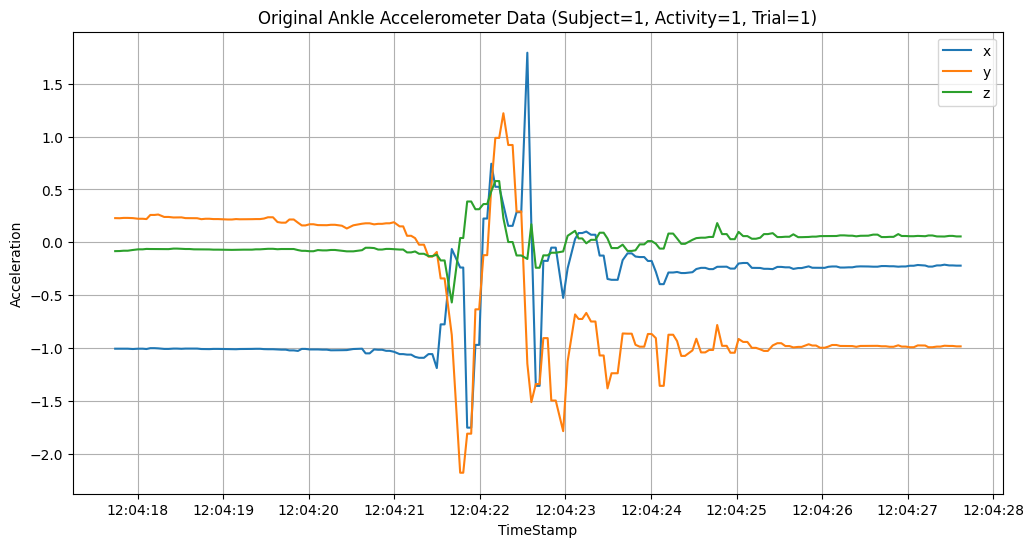

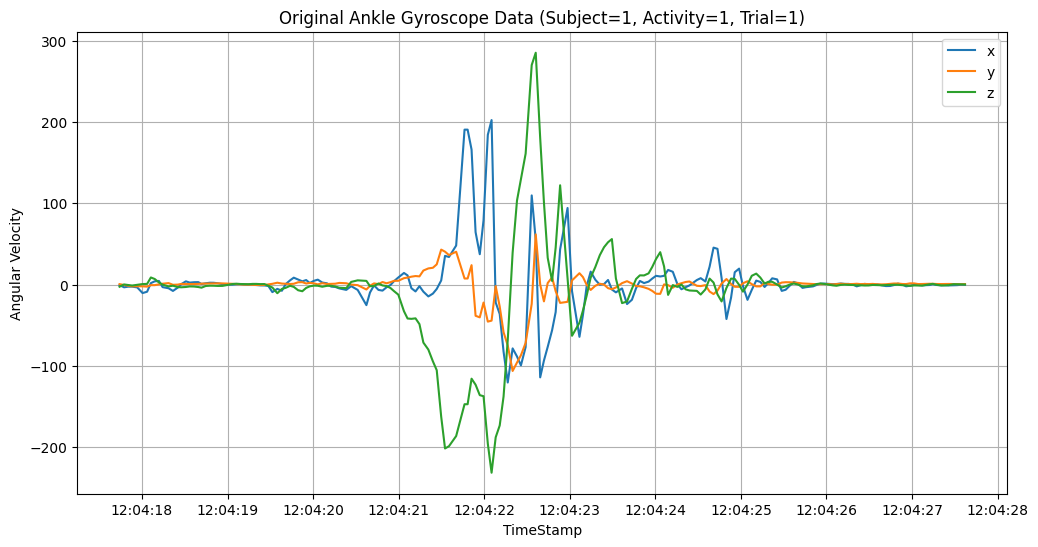

In [36]:
import matplotlib.pyplot as plt
import pandas as pd

# Specify the Subject, Activity, and Trial to plot
subject_id_to_plot = 1
activity_id_to_plot = 1
trial_id_to_plot = 1

# Filter the Ankle DataFrame
filtered_df = Ankle[
    (Ankle['Subject'] == subject_id_to_plot) &
    (Ankle['Activity'] == activity_id_to_plot) &
    (Ankle['Trial'] == trial_id_to_plot)
]

if filtered_df.empty:
    print(f"No data found for Subject={subject_id_to_plot}, Activity={activity_id_to_plot}, Trial={trial_id_to_plot} in the original Ankle dataset.")
else:
    # Convert 'TimeStamp' to datetime objects
    filtered_df['TimeStamp'] = pd.to_datetime(filtered_df['TimeStamp'])

    # Accelerometer columns for Ankle
    accel_cols = ['Ankle_acc_x', 'Ankle_acc_y', 'Ankle_acc_z']

    # Plot Accelerometer data
    plt.figure(figsize=(12, 6))
    for col in accel_cols:
        axis = col.split("_")[-1]  # Get x, y, or z
        plt.plot(filtered_df['TimeStamp'], filtered_df[col], label=axis)
    plt.xlabel("TimeStamp")
    plt.ylabel("Acceleration")
    plt.title(f'Original Ankle Accelerometer Data (Subject={subject_id_to_plot}, Activity={activity_id_to_plot}, Trial={trial_id_to_plot})')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Gyroscope columns for Ankle
    gyro_cols = ['Ankle_gyro_x', 'Ankle_gyro_y', 'Ankle_gyro_z']

    # Plot Gyroscope data
    plt.figure(figsize=(12, 6))
    for col in gyro_cols:
        axis = col.split("_")[-1]  # Get x, y, or z
        plt.plot(filtered_df['TimeStamp'], filtered_df[col], label=axis)
    plt.xlabel("TimeStamp")
    plt.ylabel("Angular Velocity")
    plt.title(f'Original Ankle Gyroscope Data (Subject={subject_id_to_plot}, Activity={activity_id_to_plot}, Trial={trial_id_to_plot})')
    plt.legend()
    plt.grid(True)
    plt.show()

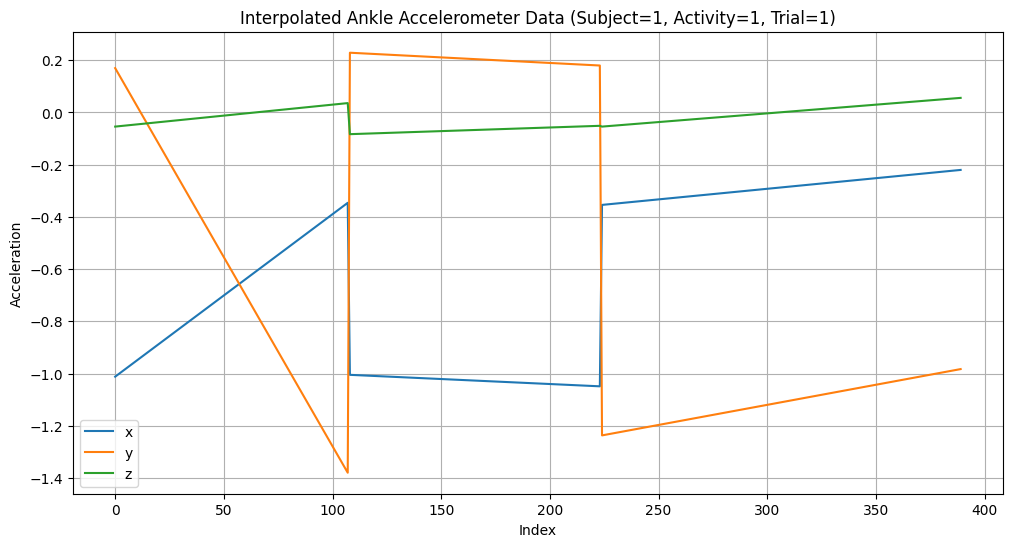

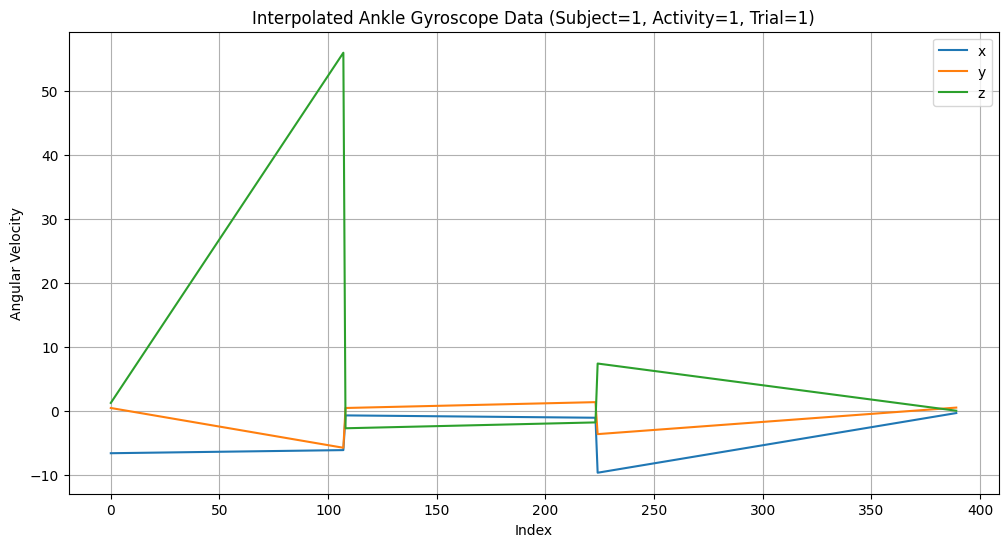

In [45]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have already run the code to create 'increased_datasets_trial'
# and it contains the interpolated DataFrames

# Specify the dataset and the Subject, Activity, and Trial to plot
dataset_name = 'Ankle'
subject_id_to_plot = 1
activity_id_to_plot = 1
trial_id_to_plot = 1

# Get the interpolated Ankle DataFrame
if dataset_name in increased_datasets_trial:
    filtered_df = increased_datasets_trial[dataset_name][
        (increased_datasets_trial[dataset_name]['Subject'] == subject_id_to_plot) &
        (increased_datasets_trial[dataset_name]['Activity'] == activity_id_to_plot) &
        (increased_datasets_trial[dataset_name]['Trial'] == trial_id_to_plot)
    ].copy()
else:
    print(f"Interpolated '{dataset_name}' dataset not found.")
    exit()

if filtered_df.empty:
    print(f"No data found for Subject={subject_id_to_plot}, Activity={activity_id_to_plot}, Trial={trial_id_to_plot} in the interpolated {dataset_name} dataset.")
else:
    # Accelerometer columns for Ankle
    accel_cols = ['Ankle_acc_x', 'Ankle_acc_y', 'Ankle_acc_z']

    # Plot Accelerometer data
    plt.figure(figsize=(12, 6))
    for col in accel_cols:
        axis = col.split("_")[-1]  # Get x, y, or z
        plt.plot(filtered_df.index, filtered_df[col], label=axis)
    plt.xlabel("Index")
    plt.ylabel("Acceleration")
    plt.title(f'Interpolated Ankle Accelerometer Data (Subject={subject_id_to_plot}, Activity={activity_id_to_plot}, Trial={trial_id_to_plot})')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Gyroscope columns for Ankle
    gyro_cols = ['Ankle_gyro_x', 'Ankle_gyro_y', 'Ankle_gyro_z']

    # Plot Gyroscope data
    plt.figure(figsize=(12, 6))
    for col in gyro_cols:
        axis = col.split("_")[-1]  # Get x, y, or z
        plt.plot(filtered_df.index, filtered_df[col], label=axis)
    plt.xlabel("Index")
    plt.ylabel("Angular Velocity")
    plt.title(f'Interpolated Ankle Gyroscope Data (Subject={subject_id_to_plot}, Activity={activity_id_to_plot}, Trial={trial_id_to_plot})')
    plt.legend()
    plt.grid(True)
    plt.show()